In [1]:
from astroML.datasets import generate_mu_z
import matplotlib.pyplot as plt

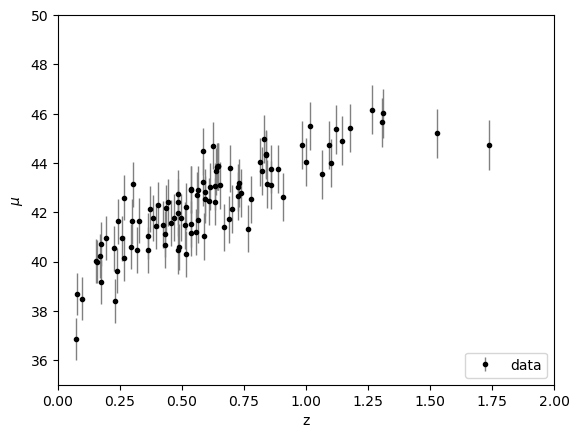

In [2]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

First let's fit our supernova synthetic data from last time using GPR.

- The key ingredient in getting a good GPR fit is the choice of the kernel and its parameters.
- Check out what's available in the `kernels` submodule of [sklearn.gaussian_process](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.gaussian_process)
- *Hint*. Radial-basis function kernel (aka squared-exponential kernel) is a standard choice in the GPR world.
- Plot the expectation value of the fit as well as the resulting 1-$\sigma$ and 2-$\sigma$ contours.
- Interpret the results.

*Note*. We have time constraints, so feel free to tweak the hyperparameters manually while in class. But, of course, a publication-quality result will require a cross-validation analysis. (Do this at home before the exam?)

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor, kernels

In [9]:
gpr = GaussianProcessRegressor(kernel = kernels.RBF(1.0), alpha = dmu) #default kernel is RBF (radial-basis function kernel)
gpr.fit(z_sample[:, None], mu_sample[:, None]) #fitting gpr to our data
gpr_value, gpr_err = gpr.predict(z_sample[:, None], return_std=True) #and predicting the expectation value and its std

C:\Users\lm101\anaconda3\envs\pymc_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


We now try to modify the kernel, by modifing its bandwidth.

In [10]:
#kernel1 = kernels.WhiteKernel()
#gpr1 = GaussianProcessRegressor(kernel1, alpha = dmu)
#gpr1.fit(z_sample[:, None], mu_sample[:, None]) #fitting gpr to our data
#gpr1_value, gpr1_err = gpr.predict(z_sample[:, None], return_std=True) #and predicting the expectation value and its std#

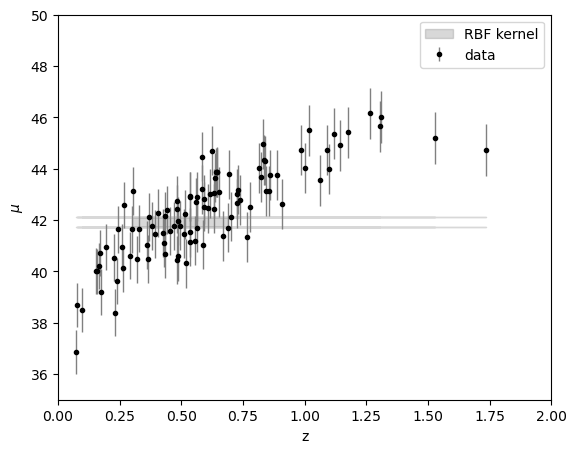

In [11]:
fig = plt.figure(figsize = (14, 5))

ax = fig.add_subplot(121)
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
ax.set(xlabel = 'z', ylabel = '$\mu$', xlim = (0, 2), ylim = (35, 50))
ax.fill_between(z_sample, gpr_value - 2 * gpr_err, gpr_value + 2 * gpr_err,  color='gray', alpha=0.3, label = 'RBF kernel')
plt.legend()

#ax = fig.add_subplot(122)
#ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
#ax.set(xlabel = 'z', ylabel = '$\mu$', xlim = (0, 2), ylim = (35, 50))
#ax.fill_between(z_sample, gpr1_value - 2 * gpr1_err, gpr1_value + 2 * gpr1_err,  color='gray', alpha=0.3, label = 'RBF kernel')

plt.legend()
plt.show()

In [8]:
gpr_err

array([0.09681902, 0.09681902, 0.09681902, 0.09681902, 0.09681902,
       0.09681902, 0.09681902, 0.09681902, 0.09681902, 0.09681902,
       0.09681902, 0.09681902, 0.09681902, 0.09681902, 0.09681902,
       0.09681902, 0.09681902, 0.09681902, 0.09681902, 0.09681902,
       0.09681902, 0.09681902, 0.09681902, 0.09681902, 0.09681902,
       0.09681902, 0.09681902, 0.09681902, 0.09681902, 0.09681902,
       0.09681902, 0.09681902, 0.09681902, 0.09681902, 0.09681902,
       0.09681902, 0.09681902, 0.09681902, 0.09681902, 0.09681902,
       0.09681902, 0.09681902, 0.09681902, 0.09681902, 0.09681902,
       0.09681902, 0.09681902, 0.09681902, 0.09681902, 0.09681902,
       0.09681902, 0.09681902, 0.09681902, 0.09681902, 0.09681902,
       0.09681902, 0.09681902, 0.09681902, 0.09681902, 0.09681902,
       0.09681902, 0.09681902, 0.09681902, 0.09681902, 0.09681902,
       0.09681902, 0.09681902, 0.09681902, 0.09681902, 0.09681902,
       0.09681902, 0.09681902, 0.09681902, 0.09681902, 0.09681